In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [2]:
url = "https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/boston_house_prices.csv"
data = pd.read_csv(url, header=None)


# Display the first few rows of the dataset
print(data.head())

        0   1      2     3      4      5     6       7    8    9        10  \
0      506  13    NaN   NaN    NaN    NaN   NaN     NaN  NaN  NaN      NaN   
1     CRIM  ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO   
2  0.00632  18   2.31     0  0.538  6.575  65.2    4.09    1  296     15.3   
3  0.02731   0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
4  0.02729   0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

       11     12    13  
0     NaN    NaN   NaN  
1       B  LSTAT  MEDV  
2   396.9   4.98    24  
3   396.9   9.14  21.6  
4  392.83   4.03  34.7  


In [3]:
# Drop two rows by index
data = data.drop([0, 1])
print(data.columns.to_list())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# Assuming the actual column names are as you mentioned
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# Display the original DataFrame
print("Original DataFrame:")
print(data)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Original DataFrame:
        CRIM  ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD  TAX PTRATIO  \
2    0.00632  18   2.31    0  0.538  6.575  65.2    4.09   1  296    15.3   
3    0.02731   0   7.07    0  0.469  6.421  78.9  4.9671   2  242    17.8   
4    0.02729   0   7.07    0  0.469  7.185  61.1  4.9671   2  242    17.8   
5    0.03237   0   2.18    0  0.458  6.998  45.8  6.0622   3  222    18.7   
6    0.06905   0   2.18    0  0.458  7.147  54.2  6.0622   3  222    18.7   
..       ...  ..    ...  ...    ...    ...   ...     ...  ..  ...     ...   
503  0.06263   0  11.93    0  0.573  6.593  69.1  2.4786   1  273      21   
504  0.04527   0  11.93    0  0.573   6.12  76.7  2.2875   1  273      21   
505  0.06076   0  11.93    0  0.573  6.976    91  2.1675   1  273      21   
506  0.10959   0  11.93    0  0.573  6.794  89.3  2.3889   1  273      21   
507  0.04741   0  11.93    0  0.573   6.03  80.8   2.505   1  273      21   

        

In [4]:
# Display the DataFrame after dropping the row
print("\nDataFrame after dropping the specified row:")
print(data_dropped)


DataFrame after dropping the specified row:


NameError: name 'data_dropped' is not defined

In [5]:
data_dropped.head()

NameError: name 'data_dropped' is not defined

In [6]:

# Split the dataset into features (X) and target variable (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
2,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98
3,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14
4,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
5,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
6,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33


In [7]:
y.head()


2      24
3    21.6
4    34.7
5    33.4
6    36.2
Name: MEDV, dtype: object

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

X_test.head()

y_train.head()

y_test.head()

# Create a linear regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 24.291119474973478
R-squared Score: 0.6687594935356326



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


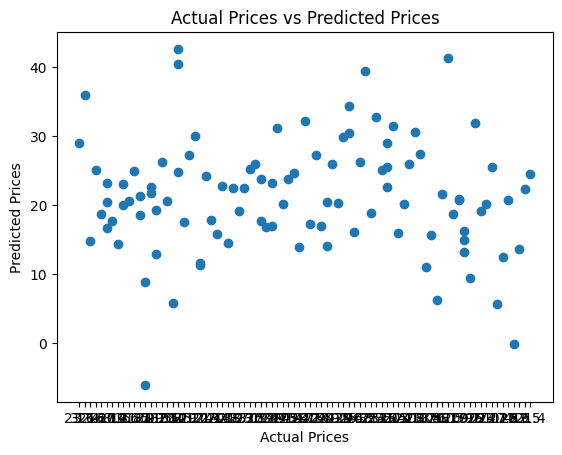

In [10]:
!pip install seaborn
import seaborn as sns
# Plotting the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

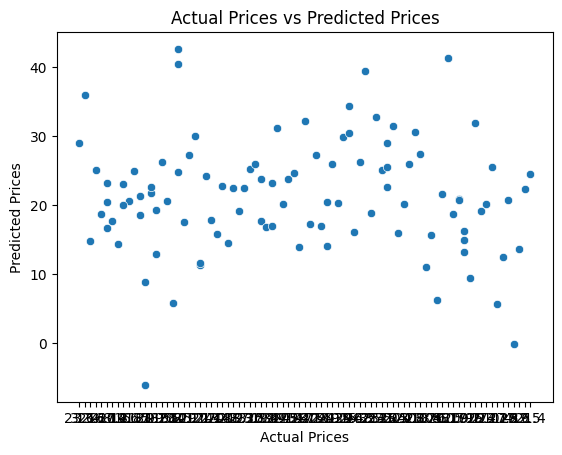

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a scatter plot using Seaborn
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

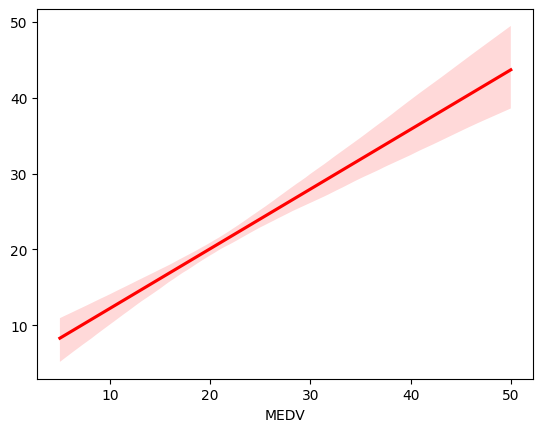

In [12]:


# Convert y_test and y_pred to numeric arrays
y_test = pd.to_numeric(y_test)
y_pred = pd.to_numeric(y_pred)


# Add a regression line to the scatter plot
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')


plt.show()


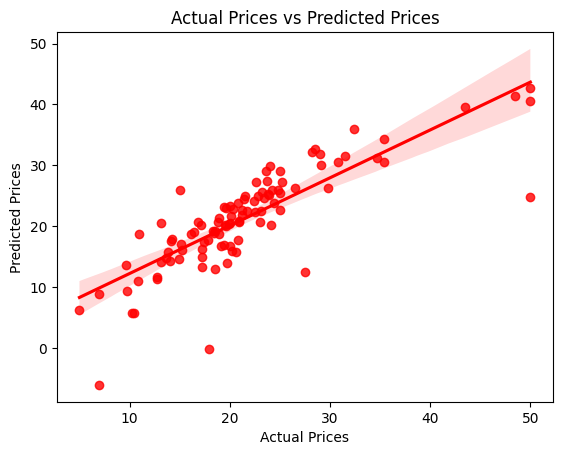

In [13]:
# Convert y_test and y_pred to numeric arrays
y_test = pd.to_numeric(y_test)
y_pred = pd.to_numeric(y_pred)


# Add a regression line to the scatter plot
sns.regplot(x=y_test, y=y_pred, scatter=True, color='red')
# Create a scatter plot using Seaborn
#sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")


plt.show()
